https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset 

Target

    Column 11 is a quantitative measure of disease progression one year after baseline
Attribute Information

        age age in years

        sex

        bmi body mass index

        bp average blood pressure

        s1 tc, total serum cholesterol

        s2 ldl, low-density lipoproteins

        s3 hdl, high-density lipoproteins

        s4 tch, total cholesterol / HDL

        s5 ltg, possibly log of serum triglycerides level

        s6 glu, blood sugar level

Computing regularization path using the lasso...
Computing regularization path using the ridge...


/Users/mgabrie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/mgabrie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6386223.549982389, tolerance: 1285.0921
  tol, rng, random, positive)
/Users/mgabrie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/mgabrie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6384231.268664072, toleran

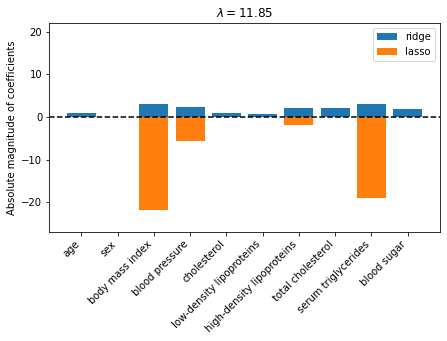

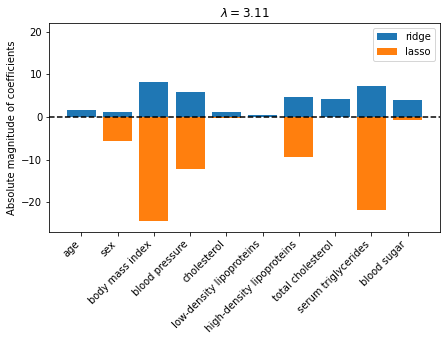

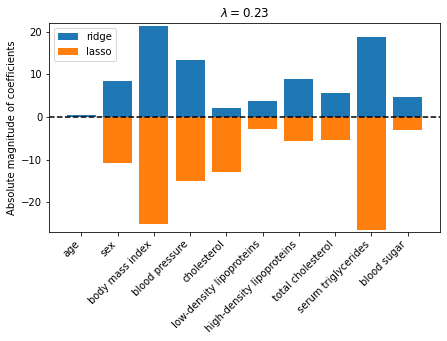

In [207]:
### Example based on the scikit learn example code by 
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets


X, y = datasets.load_diabetes(return_X_y=True)


X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

print("Computing regularization path using the ridge...")
alphas_ridge, coefs_ridge, _ = enet_path(X, y, eps=eps, l1_ratio=0., alphas=alphas_lasso)

# Display results
for i in [25, 50, 99]:
    fig = plt.figure(figsize=(7, 5))
    ax = plt.subplot(111)
    plt.title(r"$\lambda = {:0.2f}$".format(alphas_lasso[i]))
    plt.bar(range(10), np.abs(coefs_ridge[:,i]), label='ridge')
    plt.bar(range(10), np.abs(coefs_lasso[:,i]) * (-1), label='lasso')
    plt.ylim(-27, 22)
    plt.ylabel('Absolute magnitude of coefficients')
    ax.axhline(0, 0, 10, ls='--', color='k')
    ax.set_xticks(range(10))
    ax.set_xticklabels(('age', 'sex', 'body mass index', 'blood pressure', 'cholesterol', 'low-density lipoproteins', 'high-density lipoproteins', 'total cholesterol', 'serum triglycerides', 'blood sugar'), rotation = 45, ha='right')
    fig.subplots_adjust(bottom=0.3)

    plt.legend()
    # plt.savefig('lambda{:0.2f}.pdf'.format(alphas_lasso[i]), transparent=True)

(442, 10)
Computing regularization path using the lasso...
Computing regularization path using the elastic net...


/Users/mgabrie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/mgabrie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3288370.886490614, tolerance: 660.8776
  tol, rng, random, positive)
/Users/mgabrie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/mgabrie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3279701.602831821, toleranc

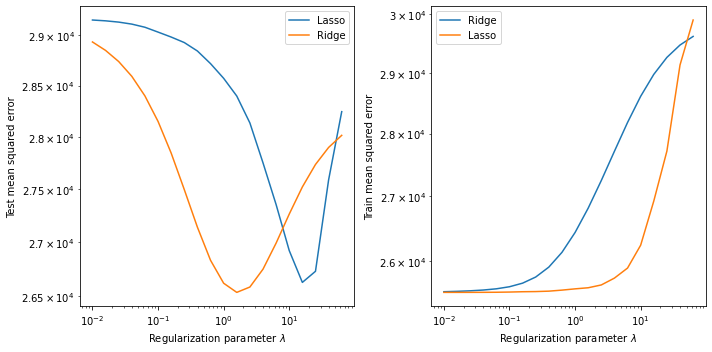

In [206]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn.model_selection import train_test_split
from sklearn import datasets


X, y = datasets.load_diabetes(return_X_y=True)
X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)


# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, eps=eps, alphas=np.logspace(-2, 1.8, 20))

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X_train, y_train, eps=eps, l1_ratio=0., alphas=alphas_lasso)

plt.figure(figsize=(10, 5))
ax = plt.subplot(121)
plt.plot(alphas_lasso, np.mean((X_test @ coefs_lasso - y_test[:, np.newaxis])**2, axis=0), label='Lasso')
plt.plot(alphas_lasso, np.mean((X_test @ coefs_enet - y_test[:, np.newaxis])**2, axis=0), label='Ridge')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Regularization parameter $\lambda$')
plt.ylabel(r'Test mean squared error')
plt.legend()
# plt.ylim(2.74e4, 2.85e4)

ax = plt.subplot(122)
plt.plot(alphas_lasso, np.mean((X_train @ coefs_enet - y_train[:, np.newaxis])**2, axis=0), label='Ridge')
plt.plot(alphas_lasso, np.mean((X_train @ coefs_lasso - y_train[:, np.newaxis])**2, axis=0), label='Lasso')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Regularization parameter $\lambda$')
plt.ylabel(r'Train mean squared error')
plt.legend()
plt.tight_layout()

plt.savefig('Test_error.pdf', transparent=True)